In [1]:
import json
import zlib

import requests

In [2]:
# model input params
prompt = "a photo of an astronaut riding a horse on mars"
negative_prompt = "NONE" # replace NONE with actual negative prompt if any
samples = 1 # no.of images to generate
scheduler = "DPMSolverMultistepScheduler"
steps = 20
guidance_scale = 7.5
seed = 1024

In [3]:
url = "http://127.0.0.1:8000/v2/models/stable_diffusion/versions/1/infer"

In [4]:
message = {
    "inputs": [
        {
            "name": "PROMPT",
            "shape": [1],
            "datatype": "BYTES",
            "data": [prompt],
        },
        {
            "name": "NEGATIVE_PROMPT",
            "shape": [1],
            "datatype": "BYTES",
            "data": [negative_prompt],
        },
        {
            "name": "SAMPLES",
            "shape": [1],
            "datatype": "INT32",
            "data": [samples],
        },
        {
          "name": "SCHEDULER",
          "shape": [1],
          "datatype": "BYTES",
          "data": [scheduler],  
        },
        {
            "name": "STEPS",
            "shape": [1],
            "datatype": "INT32",
            "data": [steps],
        },
        {
            "name": "GUIDANCE_SCALE",
            "shape": [1],
            "datatype": "FP32",
            "data": [guidance_scale],
        },
        {
            "name": "SEED",
            "shape": [1],
            "datatype": "INT64",
            "data": [seed],
        },
    ],
    "outputs": [
        {
            "name": "IMAGES",
            "parameters": {"binary_data": False},
        }
    ],
}

In [5]:
session = requests.Session()

In [6]:
bytes_message = bytes(json.dumps(message), encoding="raw_unicode_escape")
request_body = zlib.compress(bytes_message)

In [7]:
response = session.post(
        url,
        data=request_body,
        headers={
            "Content-Encoding": "gzip",
            "Accept-Encoding": "gzip",
            "Inference-Header-Content-Length": str(len(bytes_message)),
        },
    )

In [8]:
response.status_code

200

In [9]:
json_response = response.json()

In [10]:
outputs = json_response['outputs']

In [11]:
import numpy as np

In [12]:
images = np.asarray(outputs[0]['data'],dtype=np.float32)
images = np.reshape(images, outputs[0]['shape'])

In [13]:
from PIL import Image

In [14]:
if images.ndim == 3:
    images = images[None, ...]
images = (images * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]

In [15]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

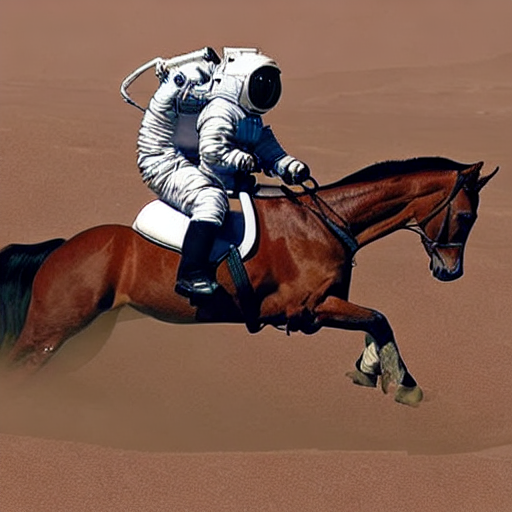

In [16]:
rows = 1 # change according to no.of samples 
cols = 1 # change according to no.of samples
# rows * cols == no.of samples
image_grid(pil_images, rows, cols)